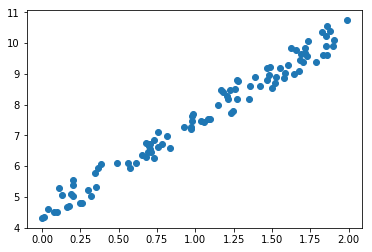

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.plot(X,y, 'o')
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.43856021],
       [3.02980865]])

In [16]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_best)


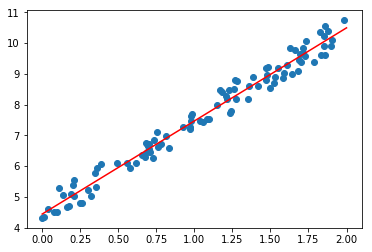

In [17]:
plt.plot(X,y,'o')
plt.plot(X_new, y_pred, 'r-')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.predict(X_new)

array([[ 4.43856021],
       [10.49817751]])

In [18]:
# Batch Gradient Descent

lr = 0.1
n_iter = 1000
m = 100

theta = np.random.randn(2,1)

for iter in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients
    
print(theta)


[[4.43856021]
 [3.02980865]]


In [19]:
# Stochastic Gradient Descent

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(epoch*m + i)
        theta = theta - lr * gradients
    
theta

array([[4.43130841],
       [3.03861438]])

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 50, tol=1e-3, penalty=None, eta0 = 0.1)

sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.41934587]), array([3.05713284]))

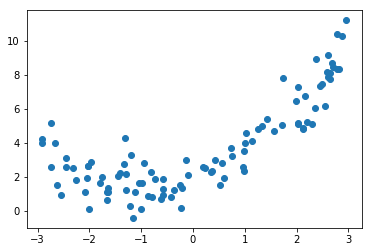

In [32]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y, 'o')
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[2.79031756] [2.79031756 7.78587207]


In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88401227]), array([[1.00141642, 0.53645954]]))

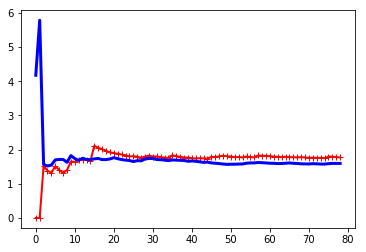

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

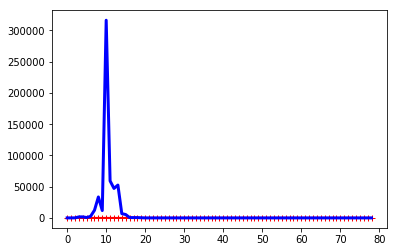

In [46]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In [56]:
# Regularized Linear Models

# clsed-form solution for l2 regularization

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')

ridge_reg.fit(X,y)

print(ridge_reg.predict([[1.5]]))

# SGD l2 regularization

sgd_reg = SGDRegressor(max_iter=100, tol=1e-3, penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

[[5.34993181]]


array([5.33884476])

In [59]:
# Logistic Regression

from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [60]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

C:\Users\Han\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


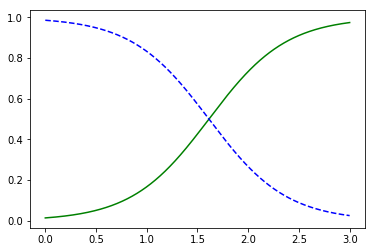

In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:,1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris-Virginica')

In [64]:
# Softmax Regression

X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])